In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
%matplotlib inline

# Section 1: Desciribing, Loading and Cleaning the Dataset

### 1.1) Desribe the Dataset


- There is a total of 6590 PlacementID, no information is specifically given on what PlacementID is, but we can assume that each PlacementID is a trade or a bulk of trades.

- There are 6 Account groups, again no information is provided on what each Account group is, but I will assume that each Account Group represents the strategy of the portfolio with each Account representing the trader, algorithm or the decision maker of each PlacementID that has been executed to the market.

- Information has been provided on when the trade was routed to the broker (PlStart), there are a total of 15 brokers. Furthermore information on the average execution price, number of shares executed to the broker,value for each PlacementID has all been provided and many more information.



## 1.2) Anything that caught your attention.

- Firstly I noticed there are 6 different types of trading styles, I assume these types may include: momentum, mean reversion, macro, event driven, systematic strategies that are implemented at the firm level.

- By obeserving some of the columns such IC/PIPWP10 bp, IC/PIPW5 bp, IC/PlcStdDevIntVWAP bp. These columns may indicate that some of the strategies employed rely on momentum indicators as well the cost associated with these strategies.

## 1.3) If you were to clean the data, how will you do it

In [ ]:
df = pd.read_excel("/content/gdrive/My Drive/IMPAX/TCA_samples_1.xlsx") # loading the dataset

In [ ]:
df

,Unnamed: 0,PlacementID,AccountGroup,Account,Ticker,Broker,TradingStyle,PlStart,Executed,Avg ExePx,...,PlIdxRtnArrEnd,IC/PlPWP10 bp,IC/PlPWP20 bp,PlLeak bp,IC/PlPostTrd 1min bp,IC/PlPostTrd 5min bp,Country,Side,ValueUSD,Market Capitalization
0,8,Placement: 5,AccountGroup: 1,Account: 1,Ticker: 23,Broker: 15,TradingStyle: 5,2019-01-02 01:00:00,4000,31.608333,...,-183.305965,144.708964,97.490270,0.000000,NaN,NaN,Taiwan,S,4106,Mid Cap
1,9,Placement: 5,AccountGroup: 1,Account: 2,Ticker: 23,Broker: 15,TradingStyle: 5,2019-01-02 01:00:00,2000,31.608333,...,-183.305965,144.708964,97.490270,0.000000,NaN,NaN,Taiwan,S,2053,Mid Cap
2,50,Placement: 25,AccountGroup: 4,Account: 17,Ticker: 9,Broker: 15,TradingStyle: 3,2019-01-02 01:00:00,171000,128.561404,...,-128.541418,22.612884,-34.541880,0.000000,39.062500,30.184688,Taiwan,S,713975,Large Cap
3,0,Placement: 1,AccountGroup: 1,Account: 1,Ticker: 7,Broker: 15,TradingStyle: 5,2019-01-02 01:20:00,43000,4.104271,...,-274.050473,38.099787,-56.524749,-121.359223,NaN,NaN,Hong Kong,S,22530,Mid Cap
4,1,Placement: 1,AccountGroup: 1,Account: 2,Ticker: 7,Broker: 15,TradingStyle: 5,2019-01-02 01:20:00,53000,4.104271,...,-274.050473,38.099787,-56.524749,-121.359223,NaN,NaN,Hong Kong,S,27769,Mid Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6586,6282,Placement: 2165,AccountGroup: 4,Account: 19,Ticker: 149,Broker: 15,TradingStyle: 3,2019-04-04 17:17:27,325,92.924523,...,-3.902398,4.735984,1.027292,-3.762834,9.068754,10.140198,USA,S,30200,Large Cap
6587,6283,Placement: 2166,AccountGroup: 4,Account: 19,Ticker: 184,Broker: 15,TradingStyle: 3,2019-04-04 17:17:29,469,40.423390,...,-4.041770,-4.363095,-0.708650,-2.471577,-0.494313,-3.777943,USA,S,18959,Large Cap
6588,6284,Placement: 2167,AccountGroup: 4,Account: 19,Ticker: 196,Broker: 15,TradingStyle: 3,2019-04-04 17:17:32,120,250.120000,...,-3.902398,0.000200,0.000200,-1.798813,-0.075284,0.752039,USA,S,30014,Large Cap
6589,6287,Placement: 2170,AccountGroup: 4,Account: 19,Ticker: 204,Broker: 15,TradingStyle: 3,2019-04-04 17:17:34,775,79.561806,...,-4.041770,-1.157149,1.482520,0.628575,1.821963,-1.011434,USA,S,61660,Large Cap


- I ordered the dataset in an ascending order of PIStart. The dataset is ordered in a way where the time order that was routed to the broker is represented in an ascending order.

- Further I have also joined all the three TCA into one dataframe

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.describe()

,Executed,Avg ExePx,OrderLifeMomentum,Pl%ADV,IC/PlArr bp,PlPart%,PlSize,IC/EMI adj Plc Arr bp,IC/PlInt VWAP bp,IC/PlDay Cl bp,...,Number of Fills,IC/PlcExecVWAP bp,PlcFill Ratio,PlIdxRtnArrEnd,IC/PlPWP10 bp,IC/PlPWP20 bp,PlLeak bp,IC/PlPostTrd 1min bp,IC/PlPostTrd 5min bp,ValueUSD
count,6.591000e+03,6591.000000,6590.000000,6549.000000,6590.000000,6591.000000,6.591000e+03,6590.000000,6591.000000,6549.000000,...,6591.000000,6590.000000,6591.000000,6565.000000,6396.000000,6491.000000,6590.000000,4851.000000,4977.000000,6.591000e+03
mean,4.258869e+04,1413.618669,-2.076010,33.272768,-21.191706,148.041942,5.222043e+05,114.864318,-0.344733,-0.171548,...,52.685632,-0.279789,67.554696,1.585682,21.100822,7.519997,-4.429917,-3.461819,-4.581874,3.581744e+05
std,1.795112e+05,10588.616883,4.292740,96.530225,89.832547,5245.551992,1.466283e+06,1381.774966,16.600780,102.131370,...,190.469831,15.178837,108.478299,45.025500,119.004851,94.027133,45.703560,37.636218,40.543231,8.300215e+05
min,1.000000e+00,1.395162,-17.187500,0.000616,-1019.417476,0.014289,1.200000e+01,-985.901932,-197.581506,-572.786516,...,0.000000,-170.645783,0.000000,-283.793182,-1011.861316,-1004.292431,-1019.417476,-569.902048,-571.404274,2.800000e+01
25%,5.480000e+02,15.781482,-3.846154,4.669675,-59.198732,8.284757,1.627400e+04,-28.154464,-4.420627,-33.356639,...,1.000000,-4.235767,26.000000,-12.118143,-23.517921,-19.533053,-4.802418,-6.236037,-9.061922,1.908350e+04
50%,3.668000e+03,52.577366,-1.204819,12.473025,-6.064281,14.575412,4.886100e+04,17.971012,-0.000184,2.148694,...,7.000000,0.000000,69.000000,0.000000,1.464871,-0.658594,0.000000,-0.292445,-0.779808,7.778700e+04
75%,2.009000e+04,212.887467,0.000000,22.066645,5.207557,46.355238,2.125230e+05,54.080024,1.293215,40.434339,...,36.000000,1.176448,100.000000,18.871325,55.418764,22.693553,0.000000,2.552573,4.615680,3.093565e+05
max,4.932000e+06,395257.386364,20.615385,970.856670,448.593694,419354.838710,1.529448e+07,26251.860541,252.593204,669.001671,...,5017.000000,252.593204,3652.000000,322.289346,927.535969,800.173735,301.724138,229.132570,229.132570,1.003538e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6591 entries, 0 to 6590
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   PlacementID                 6591 non-null   object        
 1   AccountGroup                6591 non-null   object        
 2   Account                     6591 non-null   object        
 3   Ticker                      6591 non-null   object        
 4   Broker                      6591 non-null   object        
 5   TradingStyle                6591 non-null   object        
 6   PlStart                     6591 non-null   datetime64[ns]
 7   Executed                    6591 non-null   int64         
 8   Avg ExePx                   6591 non-null   float64       
 9   OrderLifeMomentum           6590 non-null   float64       
 10  Region                      6591 non-null   object        
 11  Pl%ADV                      6549 non-null   float64     

- The count for the columns is not the same, hence I will now attempt to fill the missing values with 0 in order to have a consistent count throughout the dataset

In [ ]:
df.fillna(0)

,PlacementID,AccountGroup,Account,Ticker,Broker,TradingStyle,PlStart,Executed,Avg ExePx,OrderLifeMomentum,...,PlIdxRtnArrEnd,IC/PlPWP10 bp,IC/PlPWP20 bp,PlLeak bp,IC/PlPostTrd 1min bp,IC/PlPostTrd 5min bp,Country,Side,ValueUSD,Market Capitalization
0,Placement: 5,AccountGroup: 1,Account: 1,Ticker: 23,Broker: 15,TradingStyle: 5,2019-01-02 01:00:00,4000,31.608333,8.030303,...,-183.305965,144.708964,97.490270,0.000000,0.000000,0.000000,Taiwan,S,4106,Mid Cap
1,Placement: 5,AccountGroup: 1,Account: 2,Ticker: 23,Broker: 15,TradingStyle: 5,2019-01-02 01:00:00,2000,31.608333,8.030303,...,-183.305965,144.708964,97.490270,0.000000,0.000000,0.000000,Taiwan,S,2053,Mid Cap
2,Placement: 25,AccountGroup: 4,Account: 17,Ticker: 9,Broker: 15,TradingStyle: 3,2019-01-02 01:00:00,171000,128.561404,-0.389105,...,-128.541418,22.612884,-34.541880,0.000000,39.062500,30.184688,Taiwan,S,713975,Large Cap
3,Placement: 1,AccountGroup: 1,Account: 1,Ticker: 7,Broker: 15,TradingStyle: 5,2019-01-02 01:20:00,43000,4.104271,-2.179177,...,-274.050473,38.099787,-56.524749,-121.359223,0.000000,0.000000,Hong Kong,S,22530,Mid Cap
4,Placement: 1,AccountGroup: 1,Account: 2,Ticker: 7,Broker: 15,TradingStyle: 5,2019-01-02 01:20:00,53000,4.104271,-2.179177,...,-274.050473,38.099787,-56.524749,-121.359223,0.000000,0.000000,Hong Kong,S,27769,Mid Cap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6586,Placement: 2165,AccountGroup: 4,Account: 19,Ticker: 149,Broker: 15,TradingStyle: 3,2019-04-04 17:17:27,325,92.924523,-0.112849,...,-3.902398,4.735984,1.027292,-3.762834,9.068754,10.140198,USA,S,30200,Large Cap
6587,Placement: 2166,AccountGroup: 4,Account: 19,Ticker: 184,Broker: 15,TradingStyle: 3,2019-04-04 17:17:29,469,40.423390,-0.160474,...,-4.041770,-4.363095,-0.708650,-2.471577,-0.494313,-3.777943,USA,S,18959,Large Cap
6588,Placement: 2167,AccountGroup: 4,Account: 19,Ticker: 196,Broker: 15,TradingStyle: 3,2019-04-04 17:17:32,120,250.120000,-0.021985,...,-3.902398,0.000200,0.000200,-1.798813,-0.075284,0.752039,USA,S,30014,Large Cap
6589,Placement: 2170,AccountGroup: 4,Account: 19,Ticker: 204,Broker: 15,TradingStyle: 3,2019-04-04 17:17:34,775,79.561806,-0.087873,...,-4.041770,-1.157149,1.482520,0.628575,1.821963,-1.011434,USA,S,61660,Large Cap


Text(0.5, 1.0, 'Correlation Heatmap')

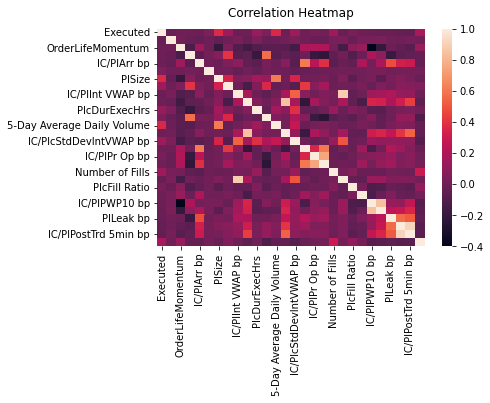

In [ ]:
heatmap = sns.heatmap(df.corr())

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

- I plotted the correlation heatmap in order to understand if there are any variables that exhibit a high correlation which may affect the analysis in further tasks.

- from the correlation heatmap we can see that PlcFill Ratio and IC/Pllnt VWAP bp exihibts high correlation.

# Section 2: Regression and Fitting

### 2.1) How does the weekly-average traded value (USD) per placement vary from week to week in “Account: 1”?

In [ ]:
Account1 = df.loc[df['Account'] == 'Account: 1'] # create a dataframe that exhibits all the values for Acount1

In [ ]:
Account1 = Account1[['PlacementID', 'PlStart', 'ValueUSD']] #include only the necessary columns

In [ ]:
Account1 = Account1.fillna(0) # fill missing values with 0

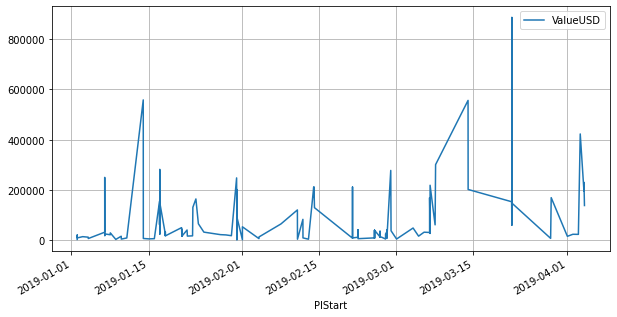

In [ ]:
Account1.plot(x='PlStart', y='ValueUSD', figsize=(10,5), grid=True) #line plot of daily tarded ValueUSD over the the 4 months

In [ ]:
Account1['week'] = Account1['PlStart'].dt.week # convert daily date into weekly

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [ ]:
Account1 # new dataframe with weeks included

,PlacementID,PlStart,ValueUSD,week
0,Placement: 5,2019-01-02 01:00:00,4106,1
3,Placement: 1,2019-01-02 01:20:00,22530,1
5,Placement: 12,2019-01-02 01:20:00,10017,1
26,Placement: 6,2019-01-03 01:00:00,15111,1
53,Placement: 7,2019-01-04 01:00:00,13008,1
...,...,...,...,...
6393,Placement: 2079,2019-04-03 02:00:00,24190,14
6410,Placement: 2125,2019-04-03 10:05:20,423089,14
6489,Placement: 2127,2019-04-04 02:20:00,195409,14
6491,Placement: 2128,2019-04-04 02:20:00,230919,14


In [ ]:
weeklyvalue = Account1.groupby('week', as_index=False)['ValueUSD'].mean()

In [ ]:
weeklyvalue # new column including the weekly traded value over 14 weeks for Account1

,week,ValueUSD
0,1,11849.285714
1,2,40631.181818
2,3,115889.117647
3,4,52873.416667
4,5,67567.900000
5,6,25160.250000
6,7,105616.888889
7,8,60570.666667
8,9,37049.235294
9,10,101237.222222


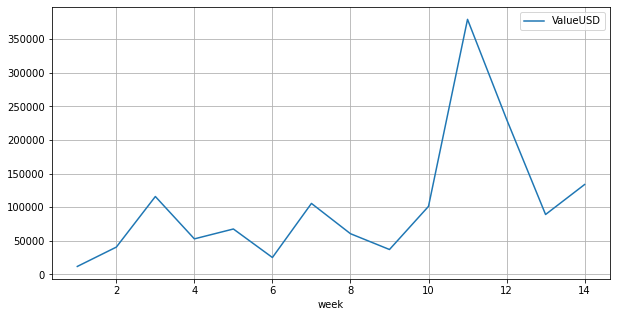

In [ ]:
weeklyvalue.plot(x='week', y='ValueUSD', figsize=(10,5), grid=True) #line plot of weekly traded ValueUSD over 14 weeks.

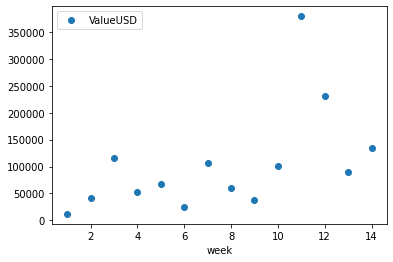

In [ ]:
weeklyvalue.plot(x='week', y='ValueUSD', style='o') #spot plot of weekly traded ValueUSD over 14 weeks.

- We can observe that weekly traded value is ranges between 30,000 and 110,000 USD from week till week 10.

- After week 10 we see a big increase from 100,000 USD till over 350,000 USD by week 11, following a sharp decrease to below 100,000 by week 13.

### 2.2) Use linear regression to estimate the weekly increment in value USD per placement. Is linear regression a good fit?

- Y = B0 + B1X + e

Where,

Y = Average weekly traded value in USD

B0 = constant

X = Week

B1 = Constant Co-efficient

e = error rate.

In [ ]:
from sklearn.linear_model import LinearRegression
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
x = weeklyvalue['week'].values.reshape(-1,1)
y = weeklyvalue['ValueUSD'].values.reshape(-1,1)

In [ ]:
# Splitting the dataset 80/20, 80% training, 20% testing.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train) # training the algorithm

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test) # predicting the algorithm

In [ ]:
actual_predicted = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
actual_predicted # Actual vs predicted values

,Actual,Predicted
0,37049.235294,130312.578586
1,105616.888889,104722.609869
2,67567.900000,79132.641152


In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[15157.71935926]
[[12794.98435853]]


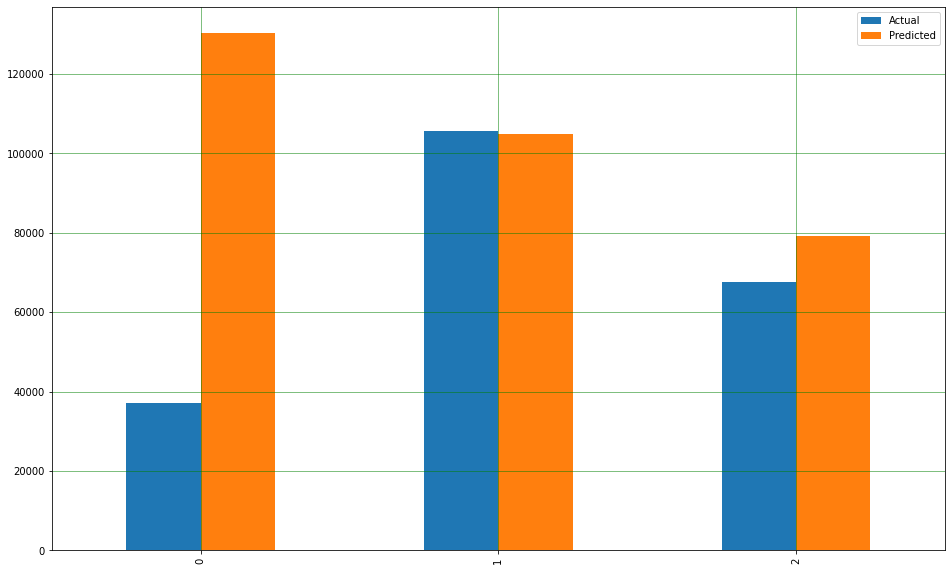

In [ ]:
actual_predicted.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show() #Histogram of actual vs predicted values.

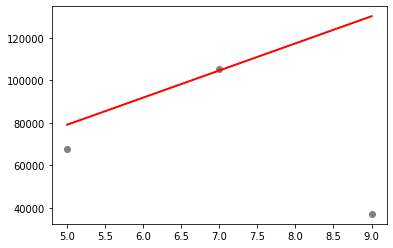

In [ ]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 35240.787821248014
Mean Squared Error: 2944198058.2873425
Root Mean Squared Error: 54260.46496563905


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

-2.7422876486995253


- By looking at the R2 and the evaluation metrics we can see there is something inheretnly wrong with the model I used, I will now use another method and see if the scores improve.

## 2.3) Another method

In [ ]:
# lasso regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

from sklearn import linear_model

In [ ]:
x = weeklyvalue[['week']]
y = weeklyvalue[['ValueUSD']]



In [ ]:
lm = linear_model.LinearRegression()

model = lm.fit(x,y)

In [ ]:
predictions = lm.predict(x)

In [ ]:
predictions

array([[ 23712.58337517],
       [ 36017.76421032],
       [ 48322.94504548],
       [ 60628.12588063],
       [ 72933.30671579],
       [ 85238.48755094],
       [ 97543.6683861 ],
       [109848.84922125],
       [122154.0300564 ],
       [134459.21089156],
       [146764.39172671],
       [159069.57256187],
       [171374.75339702],
       [183679.93423218]])

In [ ]:
y = y.to_nympy() #convert actual values into an array to compare them.

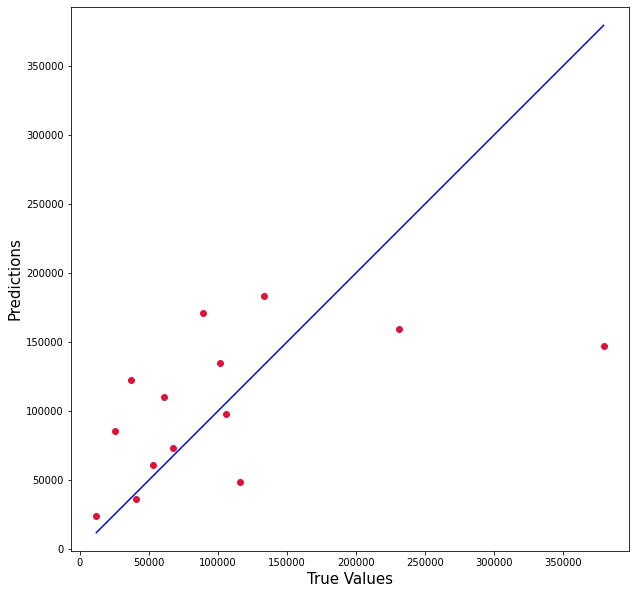

In [ ]:
# plot of actual data

plt.figure(figsize=(10,10))
plt.scatter(y, predictions, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(predictions), max(y))
p2 = min(min(predictions), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

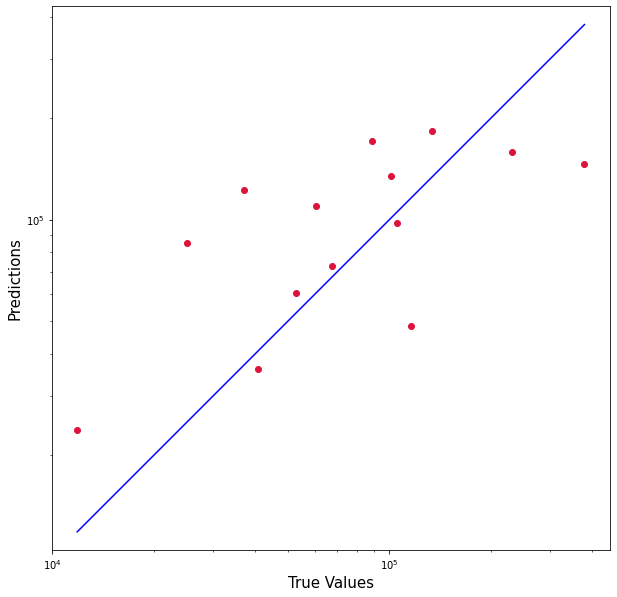

In [ ]:
#plot of normalised data

plt.figure(figsize=(10,10))
plt.scatter(y, predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions), max(y))
p2 = min(min(predictions), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
actual_predicted = pd.DataFrame({'Actual': y.flatten(), 'Predicted': predictions.flatten()})
actual_predicted # Actual vs predicted values

,Actual,Predicted
0,11849.285714,23712.583375
1,40631.181818,36017.764210
2,115889.117647,48322.945045
3,52873.416667,60628.125881
4,67567.900000,72933.306716
5,25160.250000,85238.487551
6,105616.888889,97543.668386
7,60570.666667,109848.849221
8,37049.235294,122154.030056
9,101237.222222,134459.210892


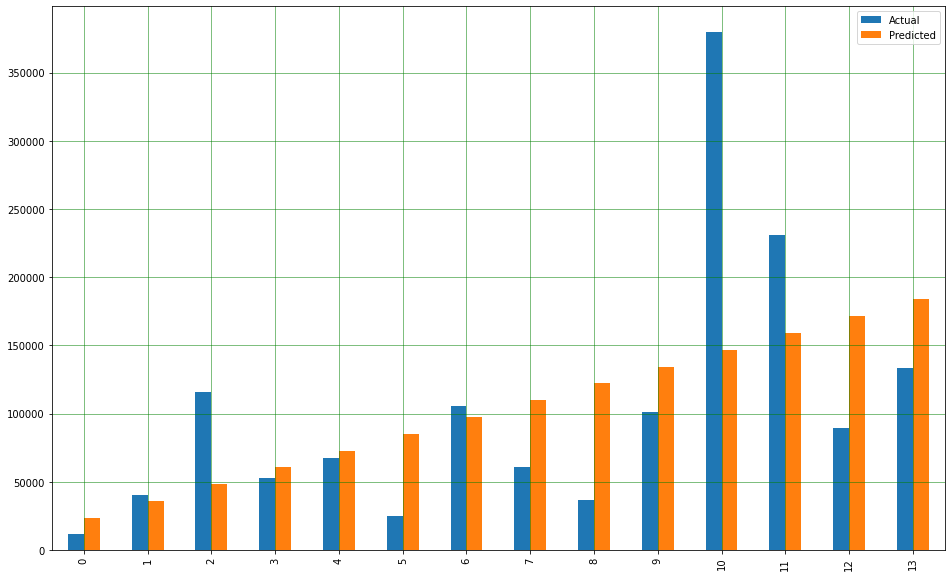

In [ ]:
actual_predicted.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show() #Histogram of actual vs predicted values.

In [ ]:
lm.score(x,y) # R^2 score

0.2816899638559598

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, predictions)))

Mean Absolute Error: 54978.31139385492
Mean Squared Error: 6274367124.538818
Root Mean Squared Error: 79210.90281355729


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y, predictions))

0.2816899638559598


- We can observe that the second method fits better than the first method. However it still displays a high error rate and the residual is high aswell, shown by the Mean Absolute Error.

- Howevery R2 has improved from -2.4 till 0.28. But still not significant enough to be considered good.

- From the histogram we can see that that some week were accurately predicted however as a whole the model exhibits a high error rate.

- moreover x, which is the number of weeks is not a robust variable to be used as the explanatory variables. This could be the reason for having a really high error rate.

Some other reasons may include not enough data points for the model to learn. Another reason is the model may require more features, not enough features have been included to help the algorithm learn and predict in a more accurate manner

- so for future reference I would firstly create more features and apply feature selection methods to create a more robust process.

## Section 3: TCA Knowledge Required

### 3.1 How does the arrival price for each account vary from month to month? (use notional weighted average)

- In this task I assume the arrival price to be IC/PlArr bp. Which is defined as the difference between the average execution price and the mid price at time of placement.

In [ ]:
arrivalprice = df[['Account', 'PlStart', 'IC/PlArr bp', 'Executed', 'PlacementID']]

arrivalprice

,Account,PlStart,IC/PlArr bp,Executed,PlacementID
0,Account: 1,2019-01-02 01:00:00,-60.272537,4000,Placement: 5
1,Account: 2,2019-01-02 01:00:00,-60.272537,2000,Placement: 5
2,Account: 17,2019-01-02 01:00:00,-72.478494,171000,Placement: 25
3,Account: 1,2019-01-02 01:20:00,-38.177589,43000,Placement: 1
4,Account: 2,2019-01-02 01:20:00,-38.177589,53000,Placement: 1
...,...,...,...,...,...
6586,Account: 19,2019-04-04 17:17:27,-9.727133,325,Placement: 2165
6587,Account: 19,2019-04-04 17:17:29,-9.048395,469,Placement: 2166
6588,Account: 19,2019-04-04 17:17:32,-1.798813,120,Placement: 2167
6589,Account: 19,2019-04-04 17:17:34,2.112823,775,Placement: 2170


In [ ]:
arrivalprice['PlMonth'] = arrivalprice['PlStart'].dt.month # convert date from daily to monthly

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
arrivalprice['IC/PlArr bp weighted'] = arrivalprice['IC/PlArr bp'] * arrivalprice['Executed']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# I create a new dataframe with the notional weighted average for each month computed.
arrival_price_accounts = (arrivalprice.groupby(['Account','PlMonth'])['IC/PlArr bp weighted'].sum()  / arrivalprice.groupby(['Account','PlMonth'])['Executed'].sum()).unstack()

In [ ]:
arrival_price_accounts #notional weighted average month by month for each account.

PlMonth,1,2,3,4
Account,,,,
Account: 1,-11.948665,-15.788335,106.645415,34.923008
Account: 10,-52.635062,-12.827523,11.030227,-1.499965
Account: 11,NaN,NaN,-10.554057,-0.075958
Account: 12,-67.120265,13.980701,11.625870,-1.516373
Account: 13,NaN,NaN,NaN,-2.317686
Account: 14,-37.761760,-10.754713,-10.024796,-0.990068
Account: 15,-37.980708,-26.278760,-4.181769,-1.992953
Account: 16,-47.392534,-26.309378,-6.803810,-0.961450
Account: 17,-55.522601,-16.276407,-21.762271,-2.834702


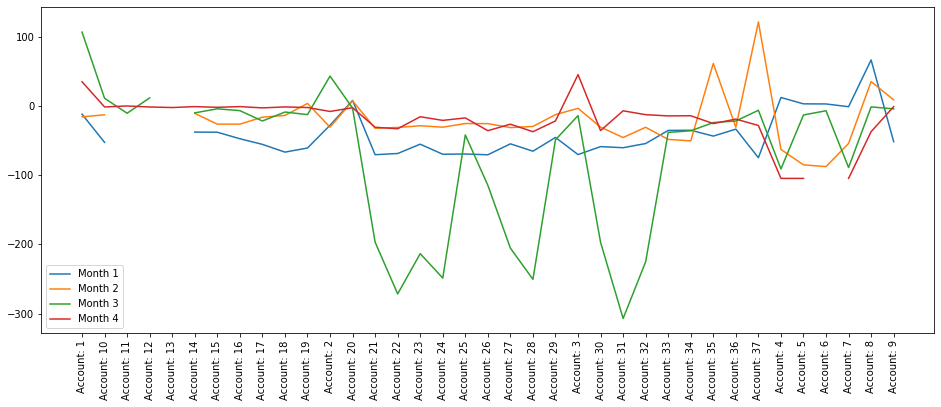

In [ ]:
# plot

plt.figure(figsize=(16,6))

plt.plot(arrival_price_accounts)
plt.xticks(rotation=90)
plt.legend(['Month 1','Month 2','Month 3','Month 4'])
plt.show()

In [ ]:
arrival_price_accounts.shape

(37, 4)

Analysis:

- Month 1: Not much variability in arrival price amongst the accounts.

- Month 2: All accounts exhibits a similar arrival price apart from account 35 and 37, we can observe a high arrival price relative to other accounts. While account 5, 6 and 7 have a negative arrival price.

- Month 3: Exhibits the most variability amongst the accounts we have see from the green line. Account 22, 24, 28, 31 are the most negative close to -300 bp. Only account 1 and 2 have a positive arrival price, rest of the account are either 0 or negative.

- Month 4: Improvement from month 3, account 3 has a positive arrival price, while account 4, 5 and 8 are negative.



## 3.2) How much do the top and bottom 5% of the best and the worst performing trades contribute to the performance?

I am unsure on how to approach this problem as performance is not defined.  Hence I will go about solving this issue using two methods.

1) Method 1. I will take the top and bottom 5% of each account using the table I created in question 3.1 and assume that values in the table constitute the performance of the trade, I calculate the mean of the 4 months include them in a new column that I will name trade performance.
I will then compare it to the PILeak which I will assume to be the performance benchmark for each account.

2) Method 2, (Which is a little bit ambitious but its worth a try). I will create a new dataframe containing all trades in the dataset. PlacementID will be assumed to be the trade while the performance of the trade will be assumed to be PlIdxRtnArrEnd.


##### be aware that transactions from multiple accounts need to be consolidated into a single trade indicated by the unique PlacementID. How you define performance is up to you, for simplicity use placement arrival price.

- Method 1

In [ ]:
arrival_price_accounts #notional weighted average month by month for each account.

PlMonth,1,2,3,4
Account,,,,
Account: 1,-11.948665,-15.788335,106.645415,34.923008
Account: 10,-52.635062,-12.827523,11.030227,-1.499965
Account: 11,NaN,NaN,-10.554057,-0.075958
Account: 12,-67.120265,13.980701,11.625870,-1.516373
Account: 13,NaN,NaN,NaN,-2.317686
Account: 14,-37.761760,-10.754713,-10.024796,-0.990068
Account: 15,-37.980708,-26.278760,-4.181769,-1.992953
Account: 16,-47.392534,-26.309378,-6.803810,-0.961450
Account: 17,-55.522601,-16.276407,-21.762271,-2.834702


In [ ]:
performance_accounts = pd.concat([arrival_price_accounts, df.groupby(['Account'])['PlLeak bp'].mean().to_frame()], axis=1) #I took the mean value of PILeak bp for each account

In [ ]:
performance_accounts

,1,2,3,4,PlLeak bp
Account,,,,,
Account: 1,-11.948665,-15.788335,106.645415,34.923008,-20.443411
Account: 10,-52.635062,-12.827523,11.030227,-1.499965,-2.302903
Account: 11,NaN,NaN,-10.554057,-0.075958,-2.130179
Account: 12,-67.120265,13.980701,11.625870,-1.516373,1.111758
Account: 13,NaN,NaN,NaN,-2.317686,-2.344881
Account: 14,-37.761760,-10.754713,-10.024796,-0.990068,3.062918
Account: 15,-37.980708,-26.278760,-4.181769,-1.992953,4.360804
Account: 16,-47.392534,-26.309378,-6.803810,-0.961450,-0.315726
Account: 17,-55.522601,-16.276407,-21.762271,-2.834702,-0.646494


In [ ]:
# I now computed the mean value for the arrival price for the 4 months for each account
mean_arrPrice_pleak = pd.concat([arrival_price_accounts.mean(axis=1).to_frame().rename({0:'mean arrival price'}, axis=1), df.groupby(['Account'])['PlLeak bp'].mean().to_frame()], axis=1)

In [ ]:
mean_arrPrice_pleak

,mean arrival price,PlLeak bp
Account,,
Account: 1,28.457856,-20.443411
Account: 10,-13.983081,-2.302903
Account: 11,-5.315008,-2.130179
Account: 12,-10.757517,1.111758
Account: 13,-2.317686,-2.344881
Account: 14,-14.882834,3.062918
Account: 15,-17.608548,4.360804
Account: 16,-20.366793,-0.315726
Account: 17,-24.098995,-0.646494


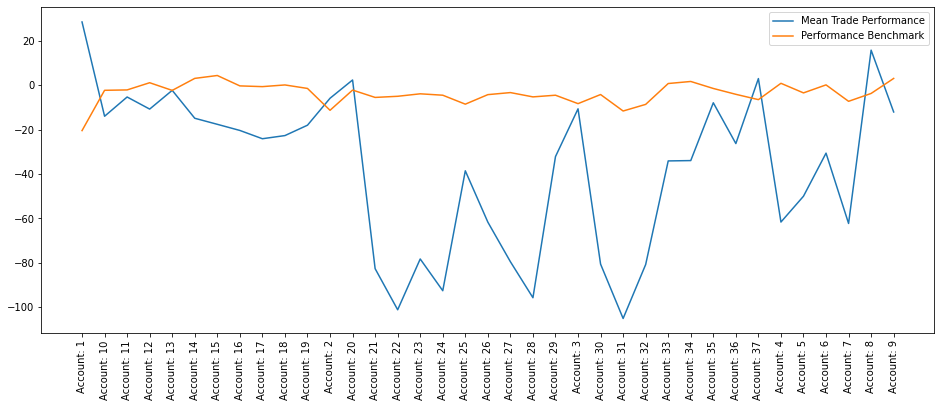

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(mean_arrPrice_pleak)
plt.xticks(rotation=90)
plt.legend(['Mean Trade Performance','Performance Benchmark'])
plt.show()

- Method 2

In [ ]:
performance = df[['PlacementID', 'PlIdxRtnArrEnd', 'Side']]

performance

,PlacementID,PlIdxRtnArrEnd,Side
0,Placement: 5,-183.305965,S
1,Placement: 5,-183.305965,S
2,Placement: 25,-128.541418,S
3,Placement: 1,-274.050473,S
4,Placement: 1,-274.050473,S
...,...,...,...
6586,Placement: 2165,-3.902398,S
6587,Placement: 2166,-4.041770,S
6588,Placement: 2167,-3.902398,S
6589,Placement: 2170,-4.041770,S


In [ ]:
performance['positive'] = performance['PlIdxRtnArrEnd'] > 0 #I create a dummy variable to distinguish positive return from negative return for each PlacementID

performance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PlacementID,PlIdxRtnArrEnd,Side,positive
0,Placement: 5,-183.305965,S,False
1,Placement: 5,-183.305965,S,False
2,Placement: 25,-128.541418,S,False
3,Placement: 1,-274.050473,S,False
4,Placement: 1,-274.050473,S,False
...,...,...,...,...
6586,Placement: 2165,-3.902398,S,False
6587,Placement: 2166,-4.041770,S,False
6588,Placement: 2167,-3.902398,S,False
6589,Placement: 2170,-4.041770,S,False


Text(0, 0.5, 'PlacementID')

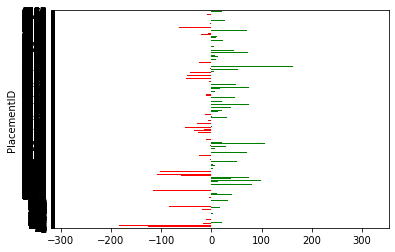

In [ ]:
# I plot the returns for each trade (PlacementID)
performance['PlIdxRtnArrEnd'].plot(kind='barh',
                                   color=performance.positive.map({True: 'g', False: 'r'}))

plt.ylabel('PlacementID')

In [ ]:
bottom5 = performance.nsmallest(n=330, columns=['PlIdxRtnArrEnd']) #bottom 5% values

In [ ]:
top5 = performance.nlargest(n=330, columns=['PlIdxRtnArrEnd']) #top5% values

In [ ]:
df2 = top5.reset_index(drop=True).merge(bottom5.reset_index(drop=True), left_index=True, right_index=True) # I merge all the columns and variables

In [ ]:
df2

,PlacementID_x,PlIdxRtnArrEnd_x,Side_x,positive_x,PlacementID_y,PlIdxRtnArrEnd_y,Side_y,positive_y
0,Placement: 510,322.289346,B,True,Placement: 12,-283.793182,S,False
1,Placement: 49,303.781393,S,True,Placement: 12,-283.793182,S,False
2,Placement: 20,274.050473,B,True,Placement: 24,-283.793182,S,False
3,Placement: 20,274.050473,B,True,Placement: 1,-274.050473,S,False
4,Placement: 20,274.050473,B,True,Placement: 1,-274.050473,S,False
...,...,...,...,...,...,...,...,...
325,Placement: 1195,75.608938,S,True,Placement: 1115,-68.367517,B,False
326,Placement: 1195,75.608938,S,True,Placement: 548,-68.129923,B,False
327,Placement: 1195,75.608938,S,True,Placement: 548,-68.129923,B,False
328,Placement: 1195,75.608938,S,True,Placement: 548,-68.129923,B,False


In [ ]:
df2 = df2.drop(['positive_x', 'positive_y'], axis=1) # I drop the unwanted columns

In [ ]:
# dataframe with the top and bottom 5% worst and best trades
df2 = df2.drop(['positive_x', 'positive_y'], axis=1)
dff = df2.rename(columns={'PlIdxRtnArrEnd_x': 'top 5% performing trades', 'PlIdxRtnArrEnd_y': 'Bottom 5% performing trades', 'PlacementID_x': 'Top 5% Trades',
                          'PlacementID_y': 'Bottom 5% trades', 'Side_x': 'Top 5% Side', 'Side_y': 'Bottom 5% Side'})

In [ ]:
dff

,Top 5% Trades,top 5% performing trades,Top 5% Side,Bottom 5% trades,Bottom 5% performing trades,Bottom 5% Side
0,Placement: 510,322.289346,B,Placement: 12,-283.793182,S
1,Placement: 49,303.781393,S,Placement: 12,-283.793182,S
2,Placement: 20,274.050473,B,Placement: 24,-283.793182,S
3,Placement: 20,274.050473,B,Placement: 1,-274.050473,S
4,Placement: 20,274.050473,B,Placement: 1,-274.050473,S
...,...,...,...,...,...,...
325,Placement: 1195,75.608938,S,Placement: 1115,-68.367517,B
326,Placement: 1195,75.608938,S,Placement: 548,-68.129923,B
327,Placement: 1195,75.608938,S,Placement: 548,-68.129923,B
328,Placement: 1195,75.608938,S,Placement: 548,-68.129923,B


Text(0, 0.5, 'Top 5% Trades')

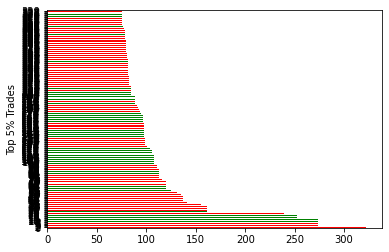

In [ ]:
# top 5% performing trades in bar chart
dff['top 5% performing trades'].plot(kind='barh',
                                   color=performance.positive.map({True: 'g', False: 'r'}))

plt.ylabel('Top 5% Trades')

Text(0, 0.5, 'Bottom 5% Trades')

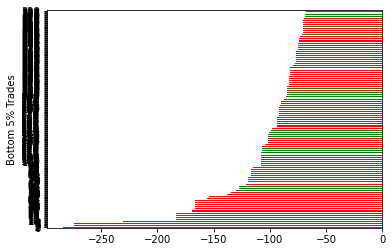

In [ ]:
# bottom 5 % performing trades in bar chart

dff['Bottom 5% performing trades'].plot(kind='barh',
                                   color=performance.positive.map({True: 'g', False: 'r'}))

plt.ylabel('Bottom 5% Trades')

## 5) Repeat the whole analysis for each account group (Strategy)

- I will use method 1 applied to Account Group

In [ ]:
accountgroup = df[['AccountGroup', 'PlStart', 'IC/PlArr bp', 'Executed', 'PlacementID']]

In [ ]:
accountgroup['PlMonth'] = accountgroup['PlStart'].dt.month # convert date from daily to monthly
accountgroup['IC/PlArr bp weighted'] = accountgroup['IC/PlArr bp'] * accountgroup['Executed']
# I create a new dataframe with the notional weighted average for each month computed.
arrival_price_account = (accountgroup.groupby(['AccountGroup','PlMonth'])['IC/PlArr bp weighted'].sum()  / accountgroup.groupby(['AccountGroup','PlMonth'])['Executed'].sum()).unstack()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
arrival_price_account

PlMonth,1,2,3,4
AccountGroup,,,,
AccountGroup: 1,-20.960882,-28.132642,56.801724,-0.741681
AccountGroup: 2,-70.270562,-3.428483,-14.037823,45.181828
AccountGroup: 3,0.379743,-55.755919,-36.728541,-104.676938
AccountGroup: 4,-23.209048,10.467060,-8.196066,-9.618812
AccountGroup: 5,-60.321656,-24.213351,-83.933739,-21.624942
AccountGroup: 6,-44.114122,9.132606,-22.643857,-20.740353


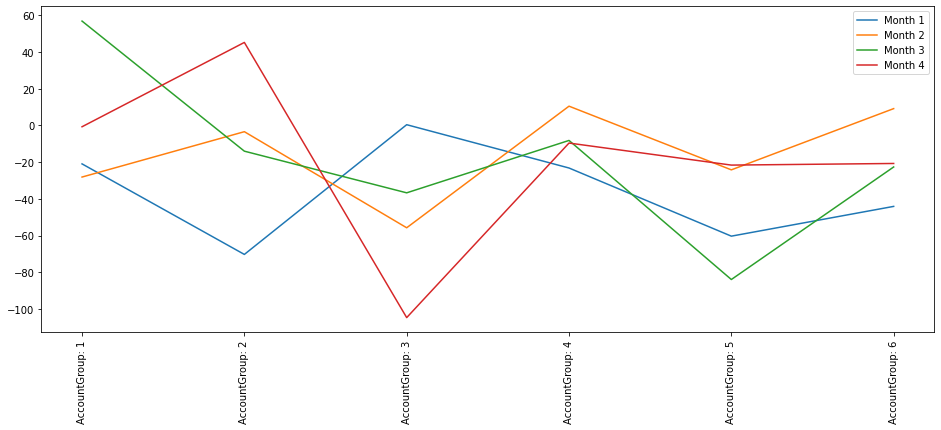

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(arrival_price_account)
plt.xticks(rotation=90)
plt.legend(['Month 1','Month 2','Month 3','Month 4'])
plt.show()

Analysis:

- Month 1: AccountGroup 3 is the best performing strategy. While all the other strategies are in the negative, AccountGroup 2 is the worst performing strategy.

- Month 2: Accountgroup 4 and 5 perform well in comparison to the other strategies while Accountgroup 2 is still the worst performing strategy.

- Month 3: we see strategy 1 overperforming all the other strategies by a high margin. While strategy 5 is the worst performing.

- Month 4: Strategy 2 is the best performing while strategy 3 is the worst performing.

In [ ]:
# top and bottom 5% performance

In [ ]:
performance_account = pd.concat([arrival_price_account, df.groupby(['AccountGroup'])['PlLeak bp'].mean().to_frame()], axis=1) #I took the mean value of PILeak bp for each account
mean_arrPrice_pleak = pd.concat([arrival_price_account.mean(axis=1).to_frame().rename({0:'mean arrival price'}, axis=1), df.groupby(['AccountGroup'])['PlLeak bp'].mean().to_frame()], axis=1)

In [ ]:
mean_arrPrice_pleak

,mean arrival price,PlLeak bp
AccountGroup,,
AccountGroup: 1,1.741630,-14.698156
AccountGroup: 2,-10.638760,-8.302832
AccountGroup: 3,-49.195414,-3.081671
AccountGroup: 4,-7.639217,-0.393485
AccountGroup: 5,-47.523422,-5.290752
AccountGroup: 6,-19.591431,-4.053731


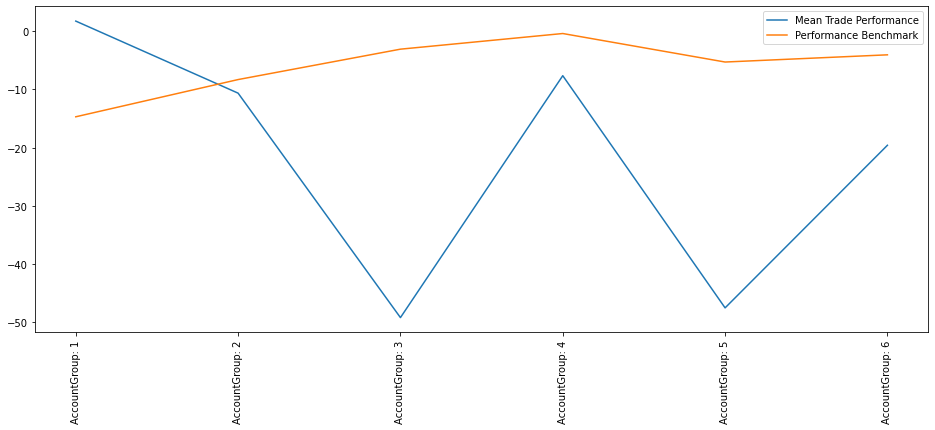

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(mean_arrPrice_pleak)
plt.xticks(rotation=90)
plt.legend(['Mean Trade Performance','Performance Benchmark'])
plt.show()

## 5) How would you measure trade performance using the data provided?

Given the data, here are some ways I would measure trade performance.

1) Number of winning vs losing trades - PILeak bp

2) Number of trades that were filled vs missed trades - PlcFill Ratio

3) Best execution price - AvgExePx



In [ ]:
Performance_metrics = df[['TradingStyle', 'PlIdxRtnArrEnd', 'PlLeak bp', 'Avg ExePx', 'PlcFill Ratio']]

In [ ]:
Performance_metrics

,TradingStyle,PlIdxRtnArrEnd,PlLeak bp,Avg ExePx,PlcFill Ratio
0,TradingStyle: 5,-183.305965,0.000000,31.608333,13
1,TradingStyle: 5,-183.305965,0.000000,31.608333,13
2,TradingStyle: 3,-128.541418,0.000000,128.561404,100
3,TradingStyle: 5,-274.050473,-121.359223,4.104271,24
4,TradingStyle: 5,-274.050473,-121.359223,4.104271,24
...,...,...,...,...,...
6586,TradingStyle: 3,-3.902398,-3.762834,92.924523,100
6587,TradingStyle: 3,-4.041770,-2.471577,40.423390,100
6588,TradingStyle: 3,-3.902398,-1.798813,250.120000,100
6589,TradingStyle: 3,-4.041770,0.628575,79.561806,100


In [ ]:
Performance_metrics = Performance_metrics.set_index('TradingStyle')

In [ ]:
Performance_metrics

,PlIdxRtnArrEnd,PlLeak bp,Avg ExePx,PlcFill Ratio
TradingStyle,,,,
TradingStyle: 5,-183.305965,0.000000,31.608333,13
TradingStyle: 5,-183.305965,0.000000,31.608333,13
TradingStyle: 3,-128.541418,0.000000,128.561404,100
TradingStyle: 5,-274.050473,-121.359223,4.104271,24
TradingStyle: 5,-274.050473,-121.359223,4.104271,24
...,...,...,...,...
TradingStyle: 3,-3.902398,-3.762834,92.924523,100
TradingStyle: 3,-4.041770,-2.471577,40.423390,100
TradingStyle: 3,-3.902398,-1.798813,250.120000,100


- I left this as I did not want to just perform the task without having a full understanding of how to approach this problem, I am more than happy to answer this in more detail but I would need some more clarification on what constitutes good performance, I would be very interested in discussing this more.

- This is the first time I work on TCA to this level of detail so excuse me if I made any technical errors.

- I thoroughly enjoyed this task despite its challenge and I am very confident that given the right guidance I will be competent and efficient in completing such tasks.

- Thank you for answering my questions and reading my work.